In [1]:
import pickle 
import numpy as np 
import pandas as pd 
import datapane as dp 
#from search_users import merge_df

new_profile = pd.read_csv('new_profile.csv')


In [2]:
new_profile.head(10)

Unnamed: 0       user_name               name type_user  \
0           0    josephmisiti      Joseph Misiti     Owner   
1           1            wepe              wepon     Owner   
2           2         ZuzooVn             Nam Vu     Owner   
3           3           rasbt  Sebastian Raschka     Owner   
4           4  lazyprogrammer  LazyProgrammer.me     Owner   
5           5       lawlite19            lawlite     Owner   
6           6    Jack-Cherish           Jack Cui     Owner   
7           7      ujjwalkarn        Ujjwal Karn     Owner   
8           8        trekhleb   Oleksii Trekhleb     Owner   
9           9        Vay-keen             Wei Ao     Owner   

                            html_url  \
0    https://github.com/josephmisiti   
1            https://github.com/wepe   
2         https://github.com/ZuzooVn   
3           https://github.com/rasbt   
4  https://github.com/lazyprogrammer   
5       https://github.com/lawlite19   
6    https://github.com/Jack-Cherish   
7      https://github.com/ujjwalkarn   
8        https://github.com/trekhleb   
9        https://github.com/Vay-keen   

                                                 bio                  company  \
0        Mathematician & Co-founder of Math & Pencil           Math & Pencil    
1                                                NaN                   AntFin   
2  A Vietnamese Software Engineer who is really p...                      NaN   
3  Machine Learning researcher & open source cont...               UW-Madison   
4                    https://deeplearningcourses.com                      NaN   
5  It's really nice for us to meet each other in ...     Southeast University   
6                            :octocat:公众号：JackCui-AI  Northeastern University   
7                                                NaN                      NaN   
8                         Software Engineer at @uber                     Uber   
9                   Talk is cheap, show me the code!      Shenzhen University   

                        email  followers  following  ...        location  \
0                         NaN       2486        273  ...    Brooklyn, NY   
1            wepon@pku.edu.cn       4505         47  ...  China Hangzhou   
2           zuzoovn@gmail.com       1188         91  ...         Vietnam   
3   mail@sebastianraschka.com      12682         33  ...     Madison, WI   
4                         NaN       2788          0  ...             NaN   
5       lawlitewang@gmail.com        615         48  ...  Nanjing, China   
6        c411184003@gmail.com       2885         28  ...           China   
7                         NaN       1945        224  ...             NaN   
8                         NaN       4904          7  ...       Amsterdam   
9  aowei2016@email.szu.edu.cn        191          0  ...          深圳市南山区   

             created_at            updated_at total_stars  max_star  forks  \
0  2010-04-17T21:09:13Z  2020-06-18T19:43:56Z       46274     45164  11819   
1  2014-10-10T14:28:18Z  2020-06-15T14:01:30Z        7108      3803   5087   
2  2012-02-11T16:55:02Z  2020-06-11T19:42:17Z       23880     23875   5632   
3  2013-10-05T16:06:10Z  2020-06-23T15:56:31Z       47703     12636  15571   
4  2012-01-03T19:14:42Z  2020-06-27T21:40:43Z        5343      5169   4955   
5  2015-09-19T02:51:34Z  2020-06-28T15:19:19Z        3864      3075   2103   
6  2016-01-25T03:38:06Z  2020-05-12T13:55:41Z       15056     10823   7689   
7  2013-11-15T13:53:58Z  2020-05-16T17:36:08Z       16134     10395   5460   
8  2012-12-09T08:38:00Z  2020-05-09T06:04:58Z       96416     73804  16632   
9  2014-11-17T02:10:56Z  2020-03-13T12:18:55Z        4124      4072   1219   

                                           languages  \
0  ['Shell', 'Java', 'Objective-C', 'Python', 'R'...   
1         ['Shell', 'Java', 'Python', 'C++', 'HTML']   
2                     ['JavaScript', 'HTML', 'Java']   
3  ['Jupyter Notebook', 'R', 'Python', 'C', 'HTML...   
4          

In [3]:
new_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1208 non-null   int64 
 1   user_name     1208 non-null   object
 2   name          1045 non-null   object
 3   type_user     1208 non-null   object
 4   html_url      1208 non-null   object
 5   bio           567 non-null    object
 6   company       545 non-null    object
 7   email         540 non-null    object
 8   followers     1208 non-null   int64 
 9   following     1208 non-null   int64 
 10  hireable      1208 non-null   bool  
 11  location      822 non-null    object
 12  created_at    1208 non-null   object
 13  updated_at    1208 non-null   object
 14  total_stars   1208 non-null   int64 
 15  max_star      1208 non-null   int64 
 16  forks         1208 non-null   int64 
 17  languages     1109 non-null   object
 18  descriptions  1109 non-null   object
 19  dates 

# Visualization

In [4]:
import altair as alt 
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import plotly.express as px


In [6]:
top_followers = new_profile.sort_values(by='followers', axis=0, ascending=False)

In [7]:
sum(top_followers.iloc[0:12,:].loc[:, 'followers'])/sum(top_followers.followers)

0.41293075864408607

In [8]:
int(len(top_followers) * 0.01)

12

In [9]:
features = ['followers',
               'following',
               'total_stars',
               'max_star',
               'forks',
                'contribution']
figs = []
for col in features:
    top_col = new_profile.sort_values(by=col, axis=0, ascending=False)
    fig = px.bar(top_col,
             x='user_name', 
             y=col,
             hover_data=[col],
             color = col 
            )
    fig = dp.Plot(fig)
    figs.append(fig)

In [10]:
correlation = px.scatter_matrix(new_profile, dimensions=['forks', 'total_stars', 'followers',
                                 'following', 'max_star','contribution'],
                               title='Correlation between datapoints')

figs.append(dp.Plot(correlation))

In [11]:
corr = new_profile.corr()

figs.append(dp.Table(corr))

In [12]:
correlation.show()

In [18]:
languages = []
for language in list(new_profile['languages']):
    #print(language)
    try:
        languages += language
    except:
        languages += ['None'] 
    


In [19]:
languages

['[',
 "'",
 'S',
 'h',
 'e',
 'l',
 'l',
 "'",
 ',',
 ' ',
 "'",
 'J',
 'a',
 'v',
 'a',
 "'",
 ',',
 ' ',
 "'",
 'O',
 'b',
 'j',
 'e',
 'c',
 't',
 'i',
 'v',
 'e',
 '-',
 'C',
 "'",
 ',',
 ' ',
 "'",
 'P',
 'y',
 't',
 'h',
 'o',
 'n',
 "'",
 ',',
 ' ',
 "'",
 'R',
 "'",
 ',',
 ' ',
 "'",
 'C',
 'S',
 'S',
 "'",
 ',',
 ' ',
 "'",
 'M',
 'a',
 'k',
 'e',
 'f',
 'i',
 'l',
 'e',
 "'",
 ',',
 ' ',
 "'",
 'H',
 'T',
 'M',
 'L',
 "'",
 ',',
 ' ',
 "'",
 'G',
 'o',
 "'",
 ',',
 ' ',
 "'",
 'J',
 'a',
 'v',
 'a',
 'S',
 'c',
 'r',
 'i',
 'p',
 't',
 "'",
 ',',
 ' ',
 "'",
 'R',
 'u',
 'b',
 'y',
 "'",
 ']',
 '[',
 "'",
 'S',
 'h',
 'e',
 'l',
 'l',
 "'",
 ',',
 ' ',
 "'",
 'J',
 'a',
 'v',
 'a',
 "'",
 ',',
 ' ',
 "'",
 'P',
 'y',
 't',
 'h',
 'o',
 'n',
 "'",
 ',',
 ' ',
 "'",
 'C',
 '+',
 '+',
 "'",
 ',',
 ' ',
 "'",
 'H',
 'T',
 'M',
 'L',
 "'",
 ']',
 '[',
 "'",
 'J',
 'a',
 'v',
 'a',
 'S',
 'c',
 'r',
 'i',
 'p',
 't',
 "'",
 ',',
 ' ',
 "'",
 'H',
 'T',
 'M',
 'L',
 "'",
 ',',
 ' '

In [15]:
from collections import Counter 

occ = dict(Counter(languages))
occ 

{'None': 1208}

In [20]:
language_df =pickle.load(open('language_df','rb'))

EOFError: Ran out of input

In [52]:
language = px.pie(language_df, values='frequency', names='languages',
      title='Frequency of languages')

figs.append(dp.Plot(language))

In [55]:
import altair as alt

hireable = alt.Chart(new_profile).transform_aggregate(
    count='count()',
    groupby=['hireable']
).mark_bar().encode(
    x='hireable:O',
    y='count:Q')

figs.append(dp.Plot(hireable))

In [69]:
from geopy.geocoders import Nominatim
import folium

address= 'Austin, TX'
geolocator = Nominatim(user_agent="khuyentran1401")
location = geolocator.geocode(address)
print(location.address)
print((location.latitude, location.longitude))

m = folium.Map(location=[location.latitude, location.longitude])


Austin, Travis County, Texas, United States of America
(30.2711286, -97.7436995)


In [70]:
locations = list(new_profile['location'])

In [36]:
lats = []
lons = []
exceptions = []

for loc in locations:
    try:
        location = geolocator.geocode(loc)
        lats.append(location.latitude)
        lons.append(location.longitude)
        print(location.address)
    except:
        print('exception', loc)
        exceptions.append(loc)

Brooklyn, New York, Kings County, New York, United States of America
杭州市, 浙江省, China 中国
Việt Nam
Madison, Dane County, Wisconsin, United States of America
None, Provincia di Torino, Piemonte, Italia
南京市, 江苏省, China 中国
中国
None, Provincia di Torino, Piemonte, Italia
Amsterdam, Noord-Holland, Nederland
南山区, 深圳市, 广东省, 518000, China 中国
Portland, Multnomah County, Oregon, United States of America
Toronto, Golden Horseshoe, Ontario, M5H 2N2, Canada
None, Provincia di Torino, Piemonte, Italia
Pittsburgh, Allegheny County, Pennsylvania, United States of America
北京市, 东城区, 北京市, 100010, China 中国
Amsterdam, Noord-Holland, Nederland
北京大学, 颐和园路, 稻香园南社区, 万柳地区, 海淀区, 北京市, 10080, China 中国
深圳市, 福田区, 深圳市, 广东省, 518000, China 中国
None, Provincia di Torino, Piemonte, Italia
Boston, Suffolk County, Massachusetts, United States of America
None, Provincia di Torino, Piemonte, Italia
Brooklyn, New York, Kings County, New York, United States of America
Sydney, New South Wales, Australia
Amsterdam, Noord-Holland, Ne

Kolkata, West Bengal, India
None, Provincia di Torino, Piemonte, Italia
San Francisco, Rue Bouvier, Plateau Lebourgneuf, Neufchâtel-Est–Lebourgneuf, Les Rivières, Québec, Québec (Agglomération), Capitale-Nationale, Québec, G2J 1R9, Canada
Florida, United States of America
Seattle, King County, Washington, United States of America
Indianapolis, Marion, Indiana, United States of America
中国
Irvine, Orange County, California, United States of America
None, Provincia di Torino, Piemonte, Italia
exception mars.localhost:2027
Campina Grande, Região Geográfica Imediata de Campina Grande, Região Metropolitana de Campina Grande, Região Geográfica Intermediária de Campina Grande, Paraíba, Região Nordeste, Brasil
Boston, Suffolk County, Massachusetts, United States of America
None, Provincia di Torino, Piemonte, Italia
Toronto, Golden Horseshoe, Ontario, M5H 2N2, Canada
None, Provincia di Torino, Piemonte, Italia
San Francisco, Rue Bouvier, Plateau Lebourgneuf, Neufchâtel-Est–Lebourgneuf, Les Rivi

Wien, Österreich
Toronto, Golden Horseshoe, Ontario, M5H 2N2, Canada
Chicago, Cook County, Illinois, United States of America
New York, United States of America
Österreich
Saarbrücken, Regionalverband Saarbrücken, Saarland, Deutschland
United Kingdom
Москва, Центральный административный округ, Москва, Центральный федеральный округ, Россия
None, Provincia di Torino, Piemonte, Italia
Việt Nam
中国
San Francisco, Rue Bouvier, Plateau Lebourgneuf, Neufchâtel-Est–Lebourgneuf, Les Rivières, Québec, Québec (Agglomération), Capitale-Nationale, Québec, G2J 1R9, Canada
San Diego, San Diego County, California, United States of America
United States
San Mateo County, California, United States of America
四川大学（望江校区）, 郭家桥北街, 高新南区, 成都市, 武侯区, 四川省, 610061, China 中国
San Francisco Bay Area, San Francisco, San Francisco City and County, California, 94130, United States of America
武汉大学, 八一路, 水果湖街道, 武昌区, 武汉市, 湖北省, 430072, China 中国
Россия
Mountain View County, Alberta, Canada
Gent, Oost-Vlaanderen, Vlaanderen, 

None, Provincia di Torino, Piemonte, Italia
Toronto, Golden Horseshoe, Ontario, M5H 2N2, Canada
None, Provincia di Torino, Piemonte, Italia
תל אביב-יפו, מחוז תל אביב, ישראל
New York, United States of America
None, Provincia di Torino, Piemonte, Italia
Rennes, Ille-et-Vilaine, Bretagne, France métropolitaine, France
None, Provincia di Torino, Piemonte, Italia
Slovenija
杭州市, 浙江省, China 中国
San Francisco, San Francisco City and County, California, United States of America
None, Provincia di Torino, Piemonte, Italia
Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
London, Greater London, England, SW1A 2DX, United Kingdom
Jönköping, Jönköpings kommun, Jönköpings län, Götaland, 55186, Sverige
None, Provincia di Torino, Piemonte, Italia
Москва, Центральный административный округ, Москва, Центральный федеральный округ, Россия
None, Provincia di Torino, Piemonte, Italia
exception  BUPT @ Beijing, Guangzhou, Shanghai
Canada
Brasil
None, Provincia di Torino, Piemonte, Italia
Toronto, 

Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
Toronto, Golden Horseshoe, Ontario, M5H 2N2, Canada
杭州市, 浙江省, China 中国
San Francisco Bay Area, San Francisco, San Francisco City and County, California, 94130, United States of America
Zürich, Bezirk Zürich, Zürich, Switzerland
India
None, Provincia di Torino, Piemonte, Italia
None, Provincia di Torino, Piemonte, Italia
Amsterdam, Noord-Holland, Nederland
Chicagoland Speedway, West Schweizer Road, CenterPoint Intermodal Center - Joliet, IL, Union, Joliet, Will County, Illinois, 60433, United States of America
New York, United States of America
None, Provincia di Torino, Piemonte, Italia
Zürich, Bezirk Zürich, Zürich, Switzerland
Edinburgh, City of Edinburgh, Scotland, EH1 3EG, United Kingdom
exception High dimensional abstract space
New York, United States of America
杭州市, 浙江省, China 中国
Austin, Travis County, Texas, United States of America
Berkeley, Chatsworth, Grey County, Southwestern Ontario, Ontario, N0H 1C0, Canada

None, Provincia di Torino, Piemonte, Italia
San Francisco, Rue Bouvier, Plateau Lebourgneuf, Neufchâtel-Est–Lebourgneuf, Les Rivières, Québec, Québec (Agglomération), Capitale-Nationale, Québec, G2J 1R9, Canada
None, Provincia di Torino, Piemonte, Italia
None, Provincia di Torino, Piemonte, Italia
United Kingdom
None, Provincia di Torino, Piemonte, Italia
None, Provincia di Torino, Piemonte, Italia
Berlin, Deutschland
None, Provincia di Torino, Piemonte, Italia
None, Provincia di Torino, Piemonte, Italia
None, Provincia di Torino, Piemonte, Italia
Minneapolis-Saint Paul Air Station, Nokomis, Hennepin County, Minnesota, United States of America
Norge, Namsos, Trøndelag, Norge
Berlin, Deutschland
City of Melbourne, Victoria, Australia
Калининград, городской округ Калининград, Калининградская область, Северо-Западный федеральный округ, Россия
東京都, 日本 (Japan)
Santa Barbara, Rue de Saint-Vallier, Petite Italie, Saint-Édouard, Montréal, Agglomération de Montréal, Montréal (06), Québec, H2S 2

Delhi, Kotwali Tehsil, Central Delhi, Delhi, 110006, India
中国
Winter Garden, Orange County, Florida, United States of America
Minneapolis, Hennepin County, Minnesota, United States of America
東京都, 日本 (Japan)
exception San Diego, CA - Stockholm, Sweden
Köln, Nordrhein-Westfalen, Deutschland
London, Greater London, England, SW1A 2DX, United Kingdom
Berlin, Deutschland
Москва, Центральный административный округ, Москва, Центральный федеральный округ, Россия
New York, United States of America
San Francisco, Rue Bouvier, Plateau Lebourgneuf, Neufchâtel-Est–Lebourgneuf, Les Rivières, Québec, Québec (Agglomération), Capitale-Nationale, Québec, G2J 1R9, Canada
St. Louis, City of Saint Louis, Missouri, United States of America
None, Provincia di Torino, Piemonte, Italia
None, Provincia di Torino, Piemonte, Italia
Saint-Étienne, Loire, Auvergne-Rhône-Alpes, France métropolitaine, France
Santiago, Provincia de Santiago, Región Metropolitana de Santiago, Chile
New Brunswick, Canada
San Francisco, 

Dublin, County Dublin, Leinster, Ireland
Waltham, Middlesex County, Massachusetts, United States of America
Nederland
None, Provincia di Torino, Piemonte, Italia
None, Provincia di Torino, Piemonte, Italia
北京市, 东城区, 北京市, 100010, China 中国
New York, United States of America
None, Provincia di Torino, Piemonte, Italia
None, Provincia di Torino, Piemonte, Italia
日本
東京都, 日本 (Japan)
None, Provincia di Torino, Piemonte, Italia
東京都, 日本 (Japan)
San Jose, Santa Clara County, California, United States of America
Barcelona, Barcelonès, Barcelona, Catalunya, 08001, España
Москва, Центральный административный округ, Москва, Центральный федеральный округ, Россия
None, Provincia di Torino, Piemonte, Italia
None, Provincia di Torino, Piemonte, Italia
None, Provincia di Torino, Piemonte, Italia
Hilo, Hawaiʻi County, Hawaii, 96720, United States of America
None, Provincia di Torino, Piemonte, Italia
None, Provincia di Torino, Piemonte, Italia
None, Provincia di Torino, Piemonte, Italia
Singapore
上海市, 黄浦区

In [157]:
exceptions

['SF Bay Area, USA',
 'In an off-grid driverless van',
 '~',
 '/dev/tcp/127.0.0.1/443',
 'mars.localhost:2027',
 'NYC, Earth, Milky Way',
 'Granada, Spain, Europe',
 '~/',
 ' BUPT @ Beijing, Guangzhou, Shanghai',
 'Third planet from the sun...',
 '三重or名古屋',
 'High dimensional abstract space',
 'Mountain View, CA / St. Louis, MO',
 'San Diego, CA - Stockholm, Sweden',
 'Somewhere, Universe',
 'Haidian Dist, Beijing, China',
 '0x7ffffffeffff']

In [74]:
location_df = new_profile[~new_profile.location.isin(exceptions)]

NameError: name 'exceptions' is not defined

In [41]:
location_df['latitude'] = lats
location_df['longitude'] = lons

<ipython-input-41-13c4882d58a6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-13c4882d58a6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
location_df = pickle.load(open('location_df','rb'))


In [15]:
px.set_mapbox_access_token('pk.eyJ1Ijoia2h1eWVudHJhbjE0MDEiLCJhIjoiY2tjM3BiZG5kMDA1MzJzcXNqNzV0dnIwOCJ9.fa4Zaso75AnRZQn8iDTieg')


In [16]:
m = px.scatter_mapbox(location_df, lat='latitude', lon='longitude',
                 color='total_stars', size='forks',
                 hover_data=['user_name','followers'],
                 title='Locations of Top Users')
figs.append(dp.Plot(m))

NameError: name 'figs' is not defined

In [86]:
dp.Report(dp.Plot(m)).publish(name='locations')

17:24:13 [INFO ] Uploading assets for Report
17:24:13 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-ho5y21f9/dp-tmp-an431077.pl.json
17:24:14 [INFO ] Report published to Datapane as https://datapane.com/khuyentran1401/reports/locations/


In [87]:

descriptions = []
for desc in new_profile['descriptions']:
    try:
        descriptions += desc
        
    except:
        pass

In [88]:
descriptions = [desc for desc in descriptions if desc != None]

In [89]:
text = ' '.join(descriptions)

In [90]:
type(text)
import nltk

In [81]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/khuyentran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/khuyentran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/khuyentran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [91]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


# lowercase
text = text.lower()

#remove punctuation
text = text.translate(str.maketrans('', '', string.punctuation))

#remove stopwords
stop_words = set(stopwords.words('english'))

#tokenize
tokens = word_tokenize(text)
new_text = [i for i in tokens if not i in stop_words]





In [92]:
new_text = ' '.join(new_text)

In [59]:
!pip install wordcloud


     |████████████████████████████████| 216 kB 3.3 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.7.0-cp38-cp38-linux_x86_64.whl size=487430 sha256=7c47232be528cf67f8a503588b4e987b1270d29e6d6534c23eed7aa64b8ca9e8
  Stored in directory: /home/khuyentran/.cache/pip/wheels/e0/38/00/528d35b61734cf027cbe8c747c441dde83c4454d8a1293ce32
Successfully built wordcloud


In [93]:
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(new_text) 

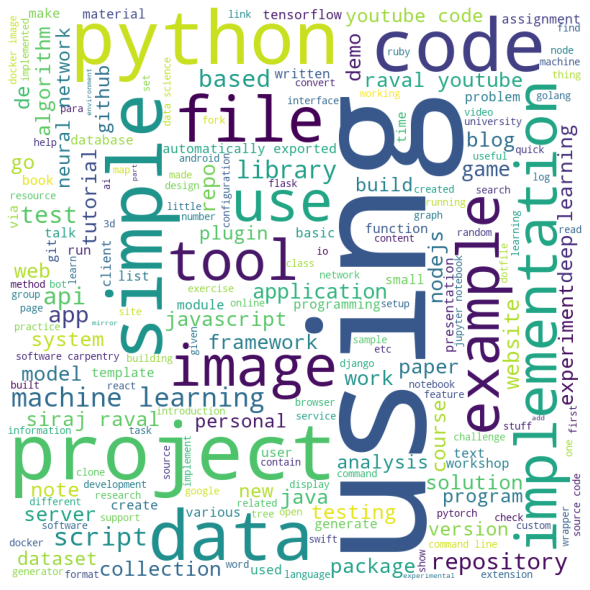

In [94]:
import matplotlib.pyplot as plt

# plot the WordCloud image                        
fig = plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

figs.append(dp.Plot(fig))

In [95]:
dp.Report(dp.Plot(fig)).publish('descriptions')

17:38:04 [INFO ] Uploading assets for Report
17:38:05 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-ho5y21f9/dp-tmp-pv03l65m.svg
17:38:07 [INFO ] Report published to Datapane as https://datapane.com/khuyentran1401/reports/descriptions/


In [167]:
def process_text(features):
    
    features = [row for row in features if row != None]
    
    text = ' '.join(features)
    
    
    
    # lowercase
    text = text.lower()

    #remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    #remove stopwords
    stop_words = set(stopwords.words('english'))

    #tokenize
    tokens = word_tokenize(text)
    new_text = [i for i in tokens if not i in stop_words]
    
    new_text = ' '.join(new_text)
    
    return new_text

def make_wordcloud(new_text):
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(new_text) 

    
    fig = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig
    

In [168]:
bios = []
for bio in new_profile['bio']:
    try:
        bios.append(bio)
        
    except:
        pass

In [169]:
bios

['Mathematician & Co-founder of Math & Pencil',
 None,
 'A Vietnamese Software Engineer who is really passionate and wants to work in the USA',
 'Machine Learning researcher & open source contributor. Author of "Python Machine Learning." Asst. Prof. of Statistics @ UW-Madison.',
 'https://deeplearningcourses.com',
 "It's really nice for us to meet each other in such a big world.",
 ':octocat:公众号：JackCui-AI',
 None,
 'Software Engineer at @uber',
 'Talk is cheap, show me the code!',
 'Independent software developer in Portland, OR. 8+ years experience, 4+ years remote/WFH. Available for part-time and week(s)-long gigs (data eng, SDET, DevOps)',
 'Sr. Data Scientist',
 'Ecole Centrale Paris, MIT',
 "SCS'18 Deep Learning @CarnegieMellonUniversity\r\n\r\n\r\n",
 'Researcher at Microsoft Research. Research interest: transfer learning.',
 'Senior Machine Learning Scientist, NLP researcher @ Elsevier, Amsterdam',
 '一个啥都想学的浮莲子',
 'Machine learning enthusiast.',
 None,
 'CV + CG + ML',
 '机器学习小学

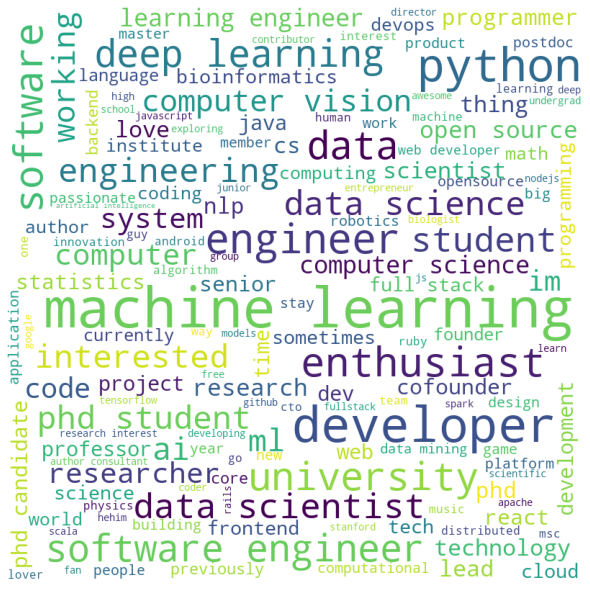

In [170]:
text = process_text(bios)

cloud = make_wordcloud(text)

figs.append(dp.Plot(cloud))

In [105]:
new_profile

user_name               name    type_user  \
0       josephmisiti      Joseph Misiti        Owner   
1               wepe              wepon        Owner   
2            ZuzooVn             Nam Vu        Owner   
3              rasbt  Sebastian Raschka        Owner   
4     lazyprogrammer  LazyProgrammer.me        Owner   
...              ...                ...          ...   
1209       aggronerd      Gregory Doran  Contributor   
1210        sdierauf     Stefan Dierauf  Contributor   
1211        fleeting     James Fleeting  Contributor   
1212    LiberiFatali               None  Contributor   
1213  Zzlongjuanfeng       zengxianfang  Contributor   

                               html_url  \
0       https://github.com/josephmisiti   
1               https://github.com/wepe   
2            https://github.com/ZuzooVn   
3              https://github.com/rasbt   
4     https://github.com/lazyprogrammer   
...                                 ...   
1209       https://github.com/aggronerd   
1210        https://github.com/sdierauf   
1211        https://github.com/fleeting   
1212    https://github.com/LiberiFatali   
1213  https://github.com/Zzlongjuanfeng   

                                                    bio              company  \
0           Mathematician & Co-founder of Math & Pencil       Math & Pencil    
1                                                  None               AntFin   
2     A Vietnamese Software Engineer who is really p...                 None   
3     Machine Learning researcher & open source cont...           UW-Madison   
4                       https://deeplearningcourses.com                 None   
...                                                 ...                  ...   
1209                                               None                 None   
1210                                            Android              @google   
1211  Not an astronaut. Former superhero. Current fr...         @Monkee-Boy    
1212                                  le petit explorer                 None   
1213                                               None  zhejiang university   

                          email  followers  following  hireable  \
0                          None       2486        273      True   
1              wepon@pku.edu.cn       4505         47     False   
2             zuzoovn@gmail.com       1188         91      True   
3     mail@sebastianraschka.com      12682         33     False   
4                          None       2788          0     False   
...                         ...        ...        ...       ...   
1209                       None          1          3      True   
1210         sdierauf@gmail.com         59         61     False   
1211  twofivethreetwo@gmail.com         93        215     False   
1212                       None         10          0      True   
1213  zzlongjuanfeng@zju.edu.cn         16         13     False   

            location            created_at            updated_at  total_stars  \
0       Brooklyn, NY  2010-04-17T21:09:13Z  2020-06-18T19:43:56Z        46274   
1     China Hangzhou  2014-10-10T14:28:18Z  2020-06-15T14:01:30Z         7108   
2            Vietnam  2012-02-11T16:55:02Z  2020-06-11T19:42:17Z        23880   
3        Madison, WI  2013-10-05T16:06:10Z  2020-06-23T15:56:31Z        47703   
4               None  2012-01-03T19:14:42Z  2020-06-27T21:40:43Z         5343   
...              ...                   ...                   ...          ...   
1209  United Kingdom  2011-09-07T22:08:59Z  2020-06-18T22:57:25Z            6   
1210  Google Seattle  2012-11-22T07:37:55Z  2020-05-14T01:41:38Z           13   
1211      Austin, TX  2008-09-03T20:46:43Z  2020-06-15T15:18:51Z           32   
1212         Vietnam  2012-11-12T06:43:17Z  2020-06-16T07:08:53Z            7   
1213        hangzhou  2016-04-18T07:00:43Z  2020-06-09T14:50:56Z            1   

      max_star  forks                                          languages  \
0     

In [173]:
dp.Report(*figs).publish(name='finding')

20:42:48 [INFO ] Uploading assets for Report
20:42:48 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-pg0xmp1y/dp-tmp-xugkxe7x.pl.json
20:42:50 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-pg0xmp1y/dp-tmp-92w13yq9.pl.json
20:42:51 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-pg0xmp1y/dp-tmp-38350c9_.pl.json
20:42:52 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-pg0xmp1y/dp-tmp-d230y6ve.pl.json
20:42:53 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-pg0xmp1y/dp-tmp-4_h7jgdr.pl.json
20:42:54 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-pg0xmp1y/dp-tmp-gxdscf03.pl.json
20:42:55 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-pg0xmp1y/dp-tmp-k4zgy4uc.pl.json
20:42:57 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-